In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plt

In [117]:
pg =  pd.read_csv("penguins_lter.csv")
pg1 =  pd.read_csv("penguins_size.csv")

In [118]:
print (pg.columns)
print (pg1.columns)
print (pg1.isnull().sum())
null_rows = pg1[pg1.isnull().any(axis=1)]
print(null_rows)

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')
Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64
    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen               NaN              NaN                NaN   
8    Adelie  Torgersen              34.1             18.1              193.0   
9    Adelie  Torgersen              42.0             20.2              190.0   
10   Adelie  Torgersen              37.8    

In [119]:
#pg1= pg1[pg1['culmen_length_mm'].isnull()].drop(columns=['culmen_length_mm'])
pg1 = pg1.dropna(subset=['culmen_length_mm'])

In [120]:
print (pg1.isnull().sum())

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  8
dtype: int64


In [121]:
pg1.shape

(342, 7)

In [122]:
print (pg.dtypes)
print (pg1.dtypes)
print (pg1.shape)

studyName               object
Sample Number            int64
Species                 object
Region                  object
Island                  object
Stage                   object
Individual ID           object
Clutch Completion       object
Date Egg                object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
Comments                object
dtype: object
species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object
(342, 7)


In [123]:
pg1['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [124]:
pg1['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

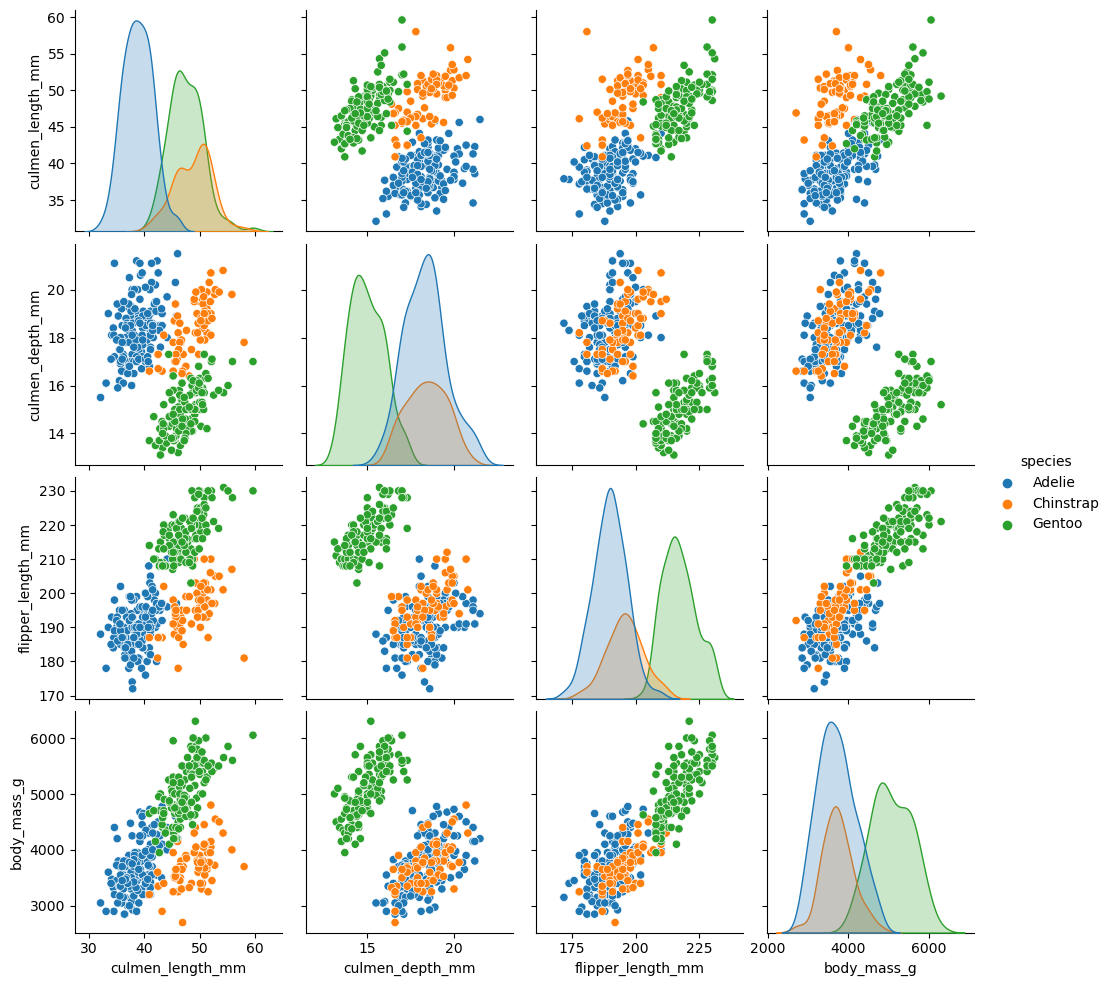

In [125]:
sns.pairplot(pg1, kind='scatter',hue='species')

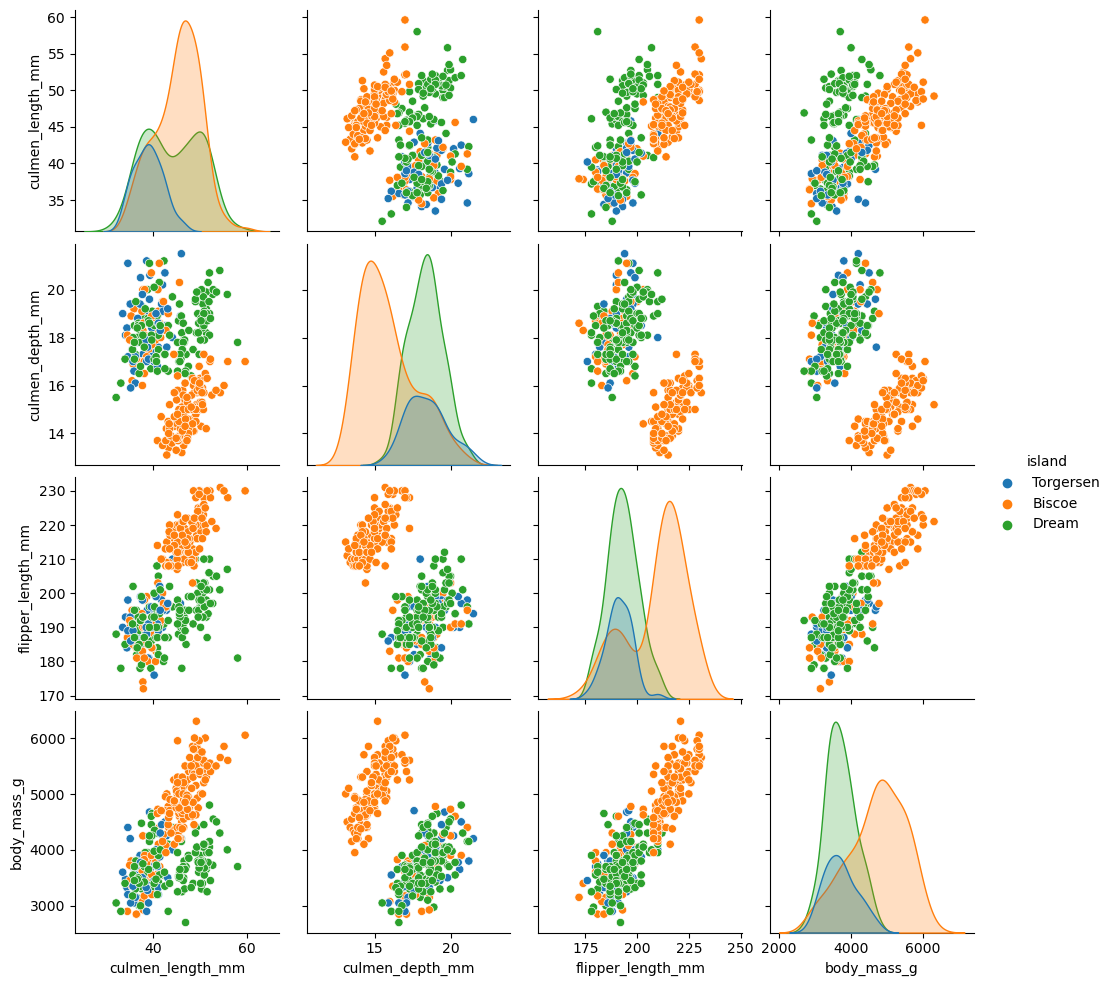

In [126]:
sns.pairplot(pg1, kind='scatter',hue='island')

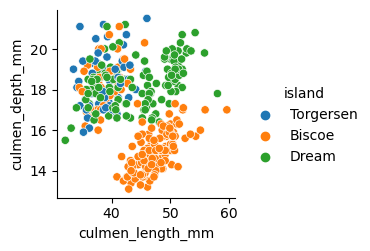

In [127]:
sns.pairplot(pg1,x_vars= 'culmen_length_mm', y_vars= 'culmen_depth_mm', kind='scatter',hue='island')

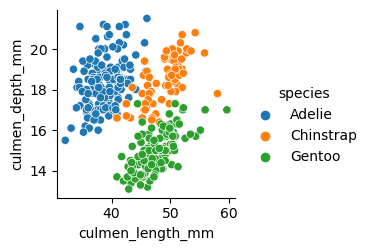

In [128]:
sns.pairplot(pg1,x_vars= 'culmen_length_mm', y_vars= 'culmen_depth_mm', kind='scatter',hue='species')

In [176]:
y = pg1['species'].values
x = pg1[['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g']]

In [177]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#y = le.fit_transform(y)

In [178]:
y_en = le.fit(pg1['species'])

# Create the label mapping: mapping of original labels to encoded values
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
#label_mapping = dict(zip(le.classes_, range(len(le.classes_))))

# Print the mapping of original values to label-encoded integers
print(label_mapping)

{'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}


In [179]:
'''le.transform(le.classes_): This applies the transformation to the class names, returning the exact numeric labels
assigned by the LabelEncoder when it was fitted. This method ensures that the class labels correspond exactly to the
transformed values.
range(len(le.classes_)): This simply generates an ordered sequence of integers from 0 to n-1 (where n is the number of
classes). It assumes that the class labels are in the order they appear in le.classes_ and assigns numeric values based on
their position in the list.
In practice, the first method (le.transform(le.classes_)) is generally preferred if you want to ensure the numeric labels
correspond exactly to what the LabelEncoder has assigned to the class names.'''

'le.transform(le.classes_): This applies the transformation to the class names, returning the exact numeric labels\nassigned by the LabelEncoder when it was fitted. This method ensures that the class labels correspond exactly to the\ntransformed values.\nrange(len(le.classes_)): This simply generates an ordered sequence of integers from 0 to n-1 (where n is the number of\nclasses). It assumes that the class labels are in the order they appear in le.classes_ and assigns numeric values based on\ntheir position in the list.\nIn practice, the first method (le.transform(le.classes_)) is generally preferred if you want to ensure the numeric labels\ncorrespond exactly to what the LabelEncoder has assigned to the class names.'

In [182]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_en, test_size=0.3, random_state=101)

TypeError: Singleton array array(LabelEncoder(), dtype=object) cannot be considered a valid collection.

In [160]:
from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression()
lr = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=15000,multi_class = "ovr")

In [181]:
lr.fit(x_train,y_train)
lr.fit(x_test,y_test)

C:\Users\Ayushi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ayushi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=15000, multi_class='ovr')

In [162]:
print(lr.score(x_test,y_test)*100)
print(lr.score(x_train,y_train)*100)

99.02912621359224
98.74476987447699
